In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt

# import SimpleNamespace
from types import SimpleNamespace

from track2p.eval.io import load_alldays_f1_values, load_pairwise_f1_values, load_alldays_ct_values
from track2p.eval.plot import plot_alldays_f1, plot_pairwise_f1

## Define loading and plotting functions

## Set paths and paramters

In [2]:
# Chemins des fichiers NumPy
base_path = '/Volumes/data_jm_share/data_proc/jm'  # Remplacez par le chemin correct
conditions = ['chan0', 'chan1', 'rigid', 'cellreg']
animals = ['jm038', 'jm039', 'jm046']
symbols = {'jm038': 'o', 'jm039': 'o', 'jm046': 'o'}
colors = {'jm038': (0.8, 0.8, 0.8), 'jm039': 'C0', 'jm046': (0.7, 0.7, 0.7)}


## All days evaluation

In [3]:
ct, acc = load_alldays_ct_values(base_path, animals, conditions, ct_type='CT')

ct_gt, acc_gt = load_alldays_ct_values(base_path, animals, conditions, ct_type='CT_GT')

# in paper CT should be used in 'all day evaluation' - it takes into account the false positives as well
# and CT_GT should be used in 'pairwise evaluation' - it can't take these into account (it only reports proportion of correctly reconstructed traces)

[['CT' 0.97 0.95 0.95 0.95 0.91 0.89]
 ['accuracy' 0.98 0.98 0.97 0.97 0.92 0.91]]
-------------------
[['CT' 0.97 0.93 0.92 0.92 0.87 0.85]
 ['accuracy' 0.98 0.95 0.94 0.93 0.88 0.87]]
-------------------
[['CT' 0.93 0.87 0.13 0.17 0.19 0.16]
 ['accuracy' 0.98 0.93 0.11 0.14 0.15 0.13]]
-------------------
[['CT' 0.14 0.0 0.0 0.0 0.0 0.0]
 ['accuracy' 0.08 0.0 0.0 0.0 0.0 0.0]]
-------------------
[['CT' 0.99 1.0 1.0 0.98 0.98 0.98]
 ['accuracy' 0.98 1.0 1.0 1.0 0.95 0.95]]
-------------------
[['CT' 0.99 1.0 1.0 0.98 0.98 0.98]
 ['accuracy' 0.98 1.0 1.0 1.0 0.95 0.95]]
-------------------
[['CT' 0.3 0.28 0.3 0.24 0.28 0.29]
 ['accuracy' 0.3 0.26 0.27 0.22 0.23 0.23]]
-------------------
[['CT' 0.52 0.31 0.0 0.0 0.0 0.0]
 ['accuracy' 0.35 0.19 0.0 0.0 0.0 0.0]]
-------------------
[['CT' 0.97 0.97 0.92 0.95 0.96 0.93]
 ['accuracy' 0.98 0.98 0.95 0.94 0.96 0.93]]
-------------------
[['CT' 0.98 0.99 0.95 0.97 0.98 0.9]
 ['accuracy' 1.0 1.0 0.97 0.97 1.0 0.93]]
-------------------
[['CT

In [4]:
# iterate over keys in ct
f1_values = {animal: [] for animal in animals}

for animal in ct.keys():
    for (i, condition) in enumerate(conditions):
        # get the last value of associated array
        f1_val = ct[animal][i][-1]
        f1_values[animal].append(f1_val)

In [5]:
f1_values

{'jm038': [0.89, 0.85, 0.16, 0.0],
 'jm039': [0.98, 0.98, 0.29, 0.0],
 'jm046': [0.93, 0.9, 0.21, 0.0]}

[0.89, 0.85, 0.16, 0.0]
[0.98, 0.98, 0.29, 0.0]
[0.93, 0.9, 0.21, 0.0]


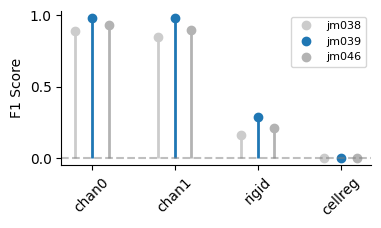

In [6]:
plot_alldays_f1(animals, conditions, f1_values, symbols, colors, xshift=0.2)


## Pairwise evaluation

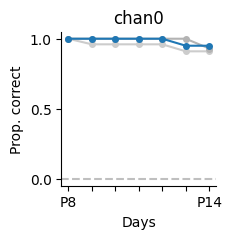

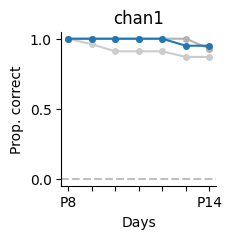

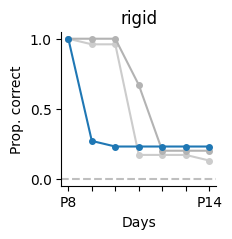

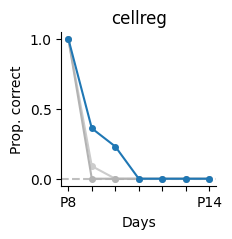

In [7]:


for (i, condition) in enumerate(conditions):
    
    # initialise dictionary
    pairwise_ct_values = {}

    for animal in animals:
        pairwise_ct_values[animal] = ct_gt[animal][i]

    plot_pairwise_f1(animals, condition, pairwise_ct_values, symbols, colors)


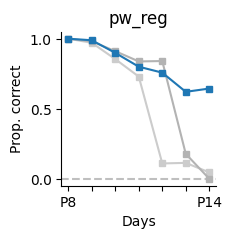

In [8]:
condition = 'pw_reg'
symbols_pw = {'jm038': 's', 'jm039': 's', 'jm046': 's'} # to differentiate from all day registration

pairwise_f1_values = load_pairwise_f1_values(base_path, animals, condition)
plot_pairwise_f1(animals, condition, pairwise_f1_values, symbols_pw, colors)
